In [2]:
import numpy as np
import pandas as pd
import datetime
from sklearn.utils import shuffle
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt


In [3]:
def print_accuracy(differences):
    length = len(differences)

    print("Accurate +-0 cat: " + str((differences.count([0])/length)*100))

    plusminusone = differences.count([0]) + differences.count([1]) + differences.count([-1])
    print("Accurate +-1 cat: " + str((plusminusone/length)*100))

    plusminustwo = plusminusone + differences.count([2]) + differences.count([-2])
    print("Accurate +-2 cat: " + str((plusminustwo/length)*100))
    
    return (plusminusone/length)*100

In [4]:
def plot_normalized_numerical_data(data_column, title, bin_size, light_mode= True):
    minlength = min(data_column.values)
    maxlength = max(data_column.values)
    bins = int((maxlength - minlength)/bin_size)+1
    differences =pd.to_numeric(data_column, errors='coerce')
    if light_mode:
        plt.title(title)
        differences.hist(bins=bins, weights = np.ones(len(data_column))/(len(data_column)*bin_size))
    else:
        plt.style.use(['dark_background'])
        fig = plt.figure()
        fig, ax = plt.subplots(nrows=1, ncols=1)
        plt.title(title)
        plt.hist(differences,bins=bins,weights = np.ones(len(data_column))/(len(data_column)*bin_size),  color="#17c264", align="mid")

        fig.patch.set_facecolor('#23293b')
        ax.set_facecolor('#23293b')
        plt.show()

In [5]:
def show_results(y_test,y_pred, title, bin_size,light_mode=True):
    differences = []
    for el1, el2 in zip(y_test,y_pred):
        differences.append([(el1-el2)])
    dif_df = pd.DataFrame(differences, columns = ['Difference'])
    
    # plot normalized
    data_column = dif_df['Difference']
    plot_normalized_numerical_data(data_column, title, bin_size,light_mode)
    
    return print_accuracy(differences)
    

In [6]:
df = pd.read_csv("Data/train_data.csv")


In [7]:
X = df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment', 'Unnamed: 0'])]
y = df.WilksRangeCat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(len(X_test))

models_results = {'Name':[],'Accuracy': []}
df_models_results = pd.DataFrame(data = models_results)

X.columns

76731


Index(['Age', 'BodyweightKg', 'Day', 'Month', 'PreviousComps', 'Sex', 'Tested',
       'Weekday', 'Year'],
      dtype='object')

# KMeans

In [10]:
cluster_assignments = KMeans(n_clusters=14,random_state=1).fit_predict(df[df.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date'])])

In [11]:
df['PredictedCat'] = cluster_assignments

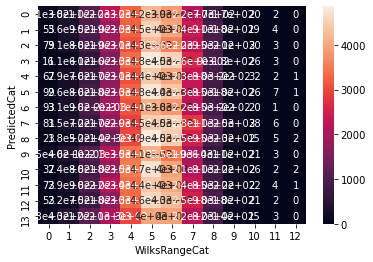

In [12]:
import seaborn as sns
tab = pd.crosstab(df['PredictedCat'],df['WilksRangeCat'])
sns.heatmap(tab,annot=True,annot_kws={"size": 10})
plt.show()

# DecisionTree

In [13]:
model_dtc = tree.DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_dtc_pred = model_dtc.predict(X_test)

Accurate +-0 cat: 29.122518929767633
Accurate +-1 cat: 69.3331248126572
Accurate +-2 cat: 89.4488537879084


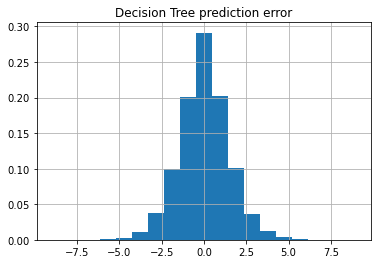

In [17]:
acc = show_results(y_test,y_dtc_pred, "Decision Tree prediction error", 1)    
df_models_results = df_models_results.append({'Name':'Decision Tree', 'Accuracy':acc}, ignore_index=True)

# KNN

In [19]:
model_knn= KNeighborsClassifier(n_neighbors=200, p=1 )
model_knn.fit(X_train, y_train)
y_knn_pred = model_knn.predict(X_test)

Accurate +-0 cat: 32.50837340840078
Accurate +-1 cat: 76.70693722224394
Accurate +-2 cat: 94.14317550924659


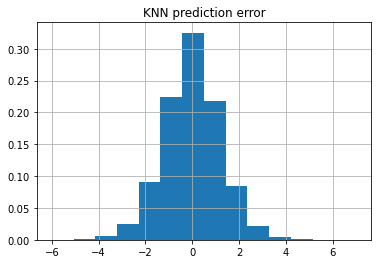

In [20]:
acc = show_results(y_test,y_knn_pred, "KNN prediction error", 1)
df_models_results = df_models_results.append({'Name':'KNN', 'Accuracy':acc}, ignore_index=True)

# RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model_rfc = RandomForestClassifier(n_estimators = 500)
model_rfc.fit(X_train, y_train)
y_rfc_pred = model_rfc.predict(X_test)

In [23]:
best_fitted_model = model_rfc

Accurate +-0 cat: 36.17964056248452
Accurate +-1 cat: 79.32647821610561
Accurate +-2 cat: 94.96943868840495


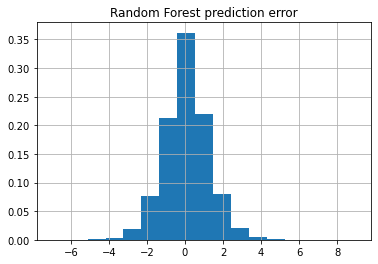

In [24]:
acc = show_results(y_test,y_rfc_pred, "Random Forest prediction error", 1)
df_models_results = df_models_results.append({'Name':'Random Forest', 'Accuracy':acc}, ignore_index=True)

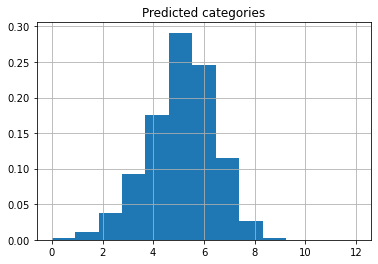

In [25]:
y_rfc_pred_df = pd.DataFrame(y_rfc_pred, columns = ['Predicted'])
plot_normalized_numerical_data(y_rfc_pred_df['Predicted'],"Predicted categories",1)

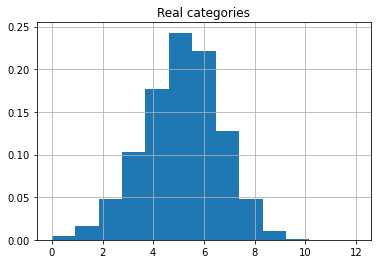

In [26]:
plot_normalized_numerical_data(y_test,"Real categories",1)

#  ExtraTreesClassifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
model_rtc = ExtraTreesClassifier(n_estimators = 200)
model_rtc.fit(X_train, y_train)
y_rtc_pred = model_rtc.predict(X_test)

Accurate +-0 cat: 35.554078534099645
Accurate +-1 cat: 78.12487781991632
Accurate +-2 cat: 94.40382635440695


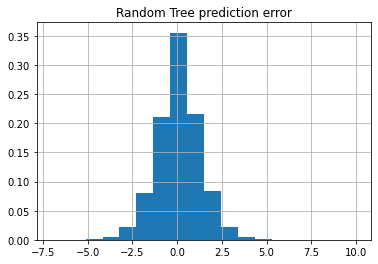

In [29]:
acc = show_results(y_test,y_rtc_pred, "Random Tree prediction error", 1)
df_models_results = df_models_results.append({'Name':'Extra Tree', 'Accuracy':acc}, ignore_index=True)

# RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 

In [31]:
model_rfr = RandomForestRegressor(n_estimators = 10)
model_rfr.fit(X_train, y_train)
y_rfr_pred = model_rfr.predict(X_test)

rmse = mean_squared_error(y_test,y_rfr_pred, squared=False)
mse = mean_squared_error(y_test,y_rfr_pred, squared=True)
print(mse)
print(rmse)

1.3865257295653628
1.1775082715485963


Accurate +-0 cat: 3.776830746373695
Accurate +-1 cat: 8.422932061357209
Accurate +-2 cat: 9.784832727320119


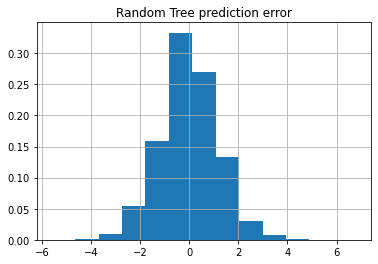

In [32]:
show_results(y_test,y_rfr_pred, "Random Tree prediction error", 1)

# Lasso

from sklearn.linear_model import Lasso

lassoM  = Lasso(alpha=0.001).fit(X_train,y_train)
y_pred = lassoM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Ridge

from sklearn.linear_model import Ridge

ridgeM = Ridge(alpha=0.1).fit(X_train,y_train)
y_pred = ridgeM.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(multi_class='multinomial')
model_lr.fit(X_train, y_train)
y_lr_pred = model_lr.predict(X_test)

C:\Users\tvaino\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accurate +-0 cat: 26.06769102448815
Accurate +-1 cat: 66.58847141311855
Accurate +-2 cat: 87.93316912330089


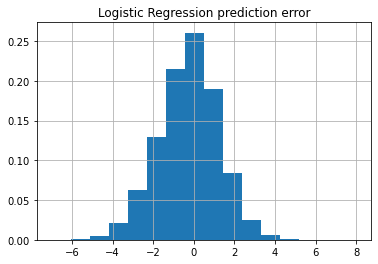

In [34]:
acc = show_results(y_test,y_lr_pred, "Logistic Regression prediction error", 1)
df_models_results = df_models_results.append({'Name':'Logistic Regression', 'Accuracy':acc}, ignore_index=True)

# SVM

from sklearn.svm import SVC

svm_1 = SVC(kernel='linear', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_poly_1 = SVC(kernel='poly', degree=2, gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_poly_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

svm_rbf_1 = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr').fit(X_train, y_train)
y_pred = svm_rbf_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


model = SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Final model

In [36]:
df_test = pd.read_csv("Data/test_data.csv")
X_final_test = df_test[df_test.columns.difference(['WilksRangeCat', 'Wilks', 'WilksRange', 'Date', 'Equipment', 'Unnamed: 0'])]
y_final_test = df_test.WilksRangeCat

# Predicting test data set
y_final_pred = best_fitted_model.predict(X_final_test)
print("Accuracy:",metrics.accuracy_score(y_final_test, y_final_pred))

Accuracy: 0.361197270471464


Accurate +-0 cat: 36.1197270471464
Accurate +-1 cat: 79.57871113706028
Accurate +-2 cat: 94.98704568676105


79.57871113706028

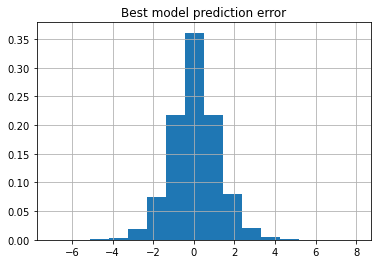

In [37]:
show_results(y_final_test,y_final_pred, "Best model prediction error", 1)

1. feature 1 (0.275037)
2. feature 0 (0.207203)
3. feature 2 (0.145853)
4. feature 8 (0.115464)
5. feature 3 (0.100845)
6. feature 4 (0.082725)
7. feature 7 (0.044471)
8. feature 5 (0.015103)
9. feature 6 (0.013299)
0 : Age
1 : BodyweightKg
2 : Day
3 : Month
4 : PreviousComps
5 : Sex
6 : Tested
7 : Weekday
8 : Year


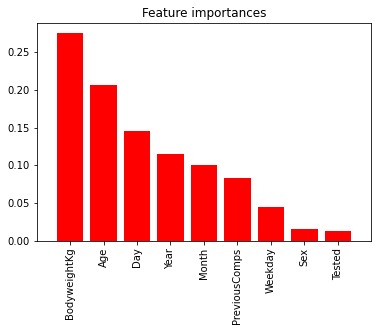

In [40]:
importances = best_fitted_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = []
for f in range(X.shape[1]):
    print("%d. feature %d (%f)"  % (f + 1, indices[f], importances[indices[f]]))
    names.append(X_train.columns[indices[f]])



for i in range(len(X_train.columns)):
    print(i, ":", X_train.columns[i])


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(len(names)), names, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()

# All models

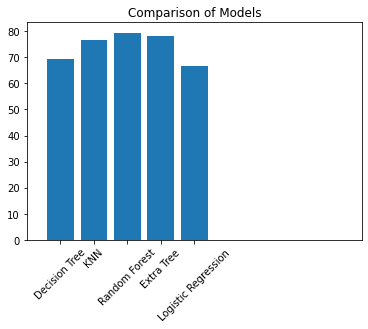

In [52]:
plt.figure()
plt.title("Comparison of Models")
plt.bar(df_models_results['Name'], df_models_results['Accuracy'], \
        align='center')

plt.xticks(range(len(df_models_results)), df_models_results['Name'], rotation = 45)
plt.show()
